<a href="https://colab.research.google.com/github/BitnooriLee/Into-Data-Science-and-AI/blob/main/DAT405_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAT405/DIT406 Introduction to Data Science and AI

# Assignment 2: Regression and classification
**Group 28 Bitnoori Lee Emil Åkesson**

Work hours : Bitnoori Lee (5hours) Emil Åkesson (5hours)

In [ ]:
# Import Data set
from google.colab import drive
drive.mount('/content/gdrive')

root = '/content/gdrive/My Drive/DAT405/'

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.model_selection import train_test_split

data = pd.read_csv(root+"data_assignment2-1.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Task 1 



No handles with labels found to put in legend.


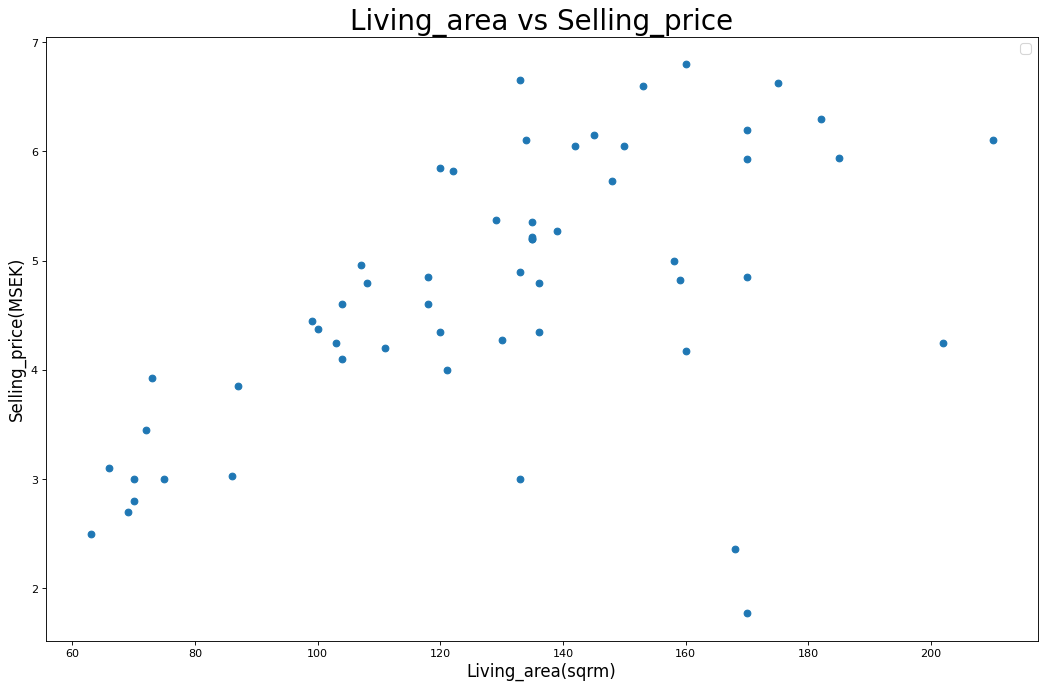

In [ ]:
#Scatter Plot of Living area vs Selling price
x = data['Living_area']
y = data['Selling_price'] / 1000000
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Living_area vs Selling_price", fontsize=25)
plt.xlabel("Living_area(sqrm)", fontsize=15)
plt.ylabel("Selling_price(MSEK)", fontsize=15)
plt.legend(fontsize=12)  
plt.scatter(x, y)
plt.show()

#1a)


In [ ]:
#Generating a linear regression model
x = x.values.reshape(-1, 1) #2D array 
model = LinearRegression().fit(x, y) 

We generate a linear regression model as above. In this case, we did not cleaning data eventhough feature Biarea has several NaN values, we only use Living_area and Selling_price. Also, we only have 55 data which is not that many so we used as many as possible if there are no major problems with the data

No handles with labels found to put in legend.


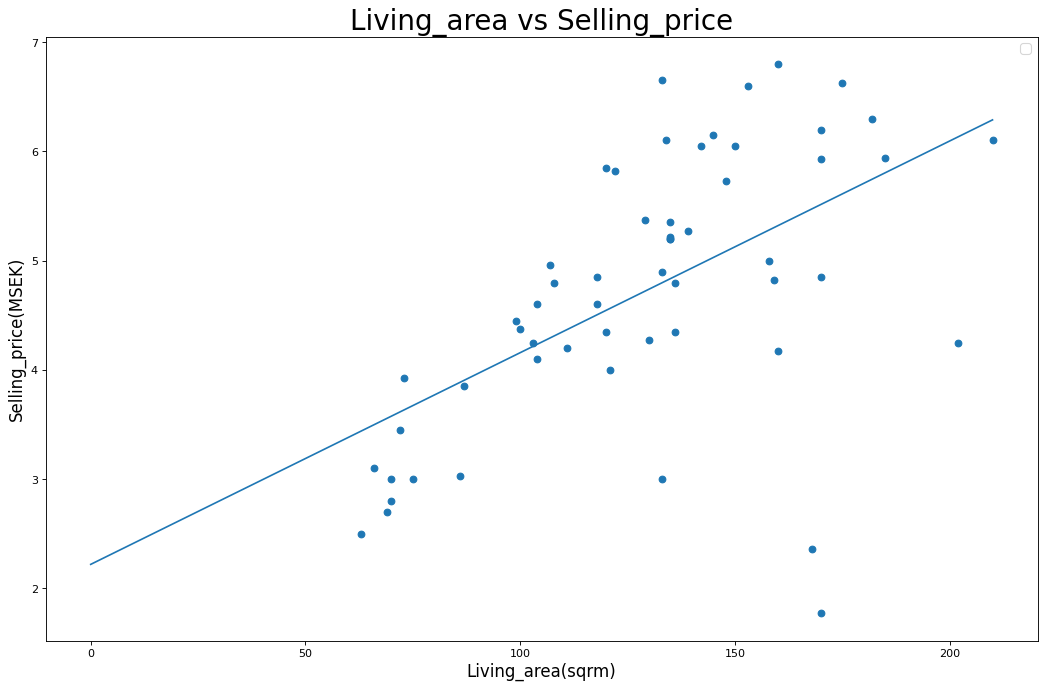

In [ ]:
#Plotting the regresion line
xfit = np.linspace(0, 210, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Living_area vs Selling_price", fontsize=25)
plt.xlabel("Living_area(sqrm)", fontsize=15)
plt.ylabel("Selling_price(MSEK)", fontsize=15)
plt.legend(fontsize=12)  
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

#1b)

In [ ]:
#Slope of the line:
print("the slope of the regression line", model.coef_[0])

the slope of the regression line 0.019370138547331578


In [ ]:
#Intercept of the line:
print("the intercept of the regression line", model.intercept_)

the intercept of the regression line 2.220603243355868


#1c)


In [ ]:
#Predicting the selling price of area 100, 150, 200
print("predicted selling price if area 100 is", model.predict([[100]])[0], "MSEK")


predicted selling price if area 100 is 4.157617098089026 MSEK


In [ ]:
print("predicted selling price if area 150 is", model.predict([[150]])[0], "MSEK")

predicted selling price if area 150 is 5.126124025455605 MSEK


In [ ]:
print("predicted selling price if area 200 is", model.predict([[200]])[0], "MSEK")

predicted selling price if area 200 is 6.094630952822184 MSEK


#1d)


No handles with labels found to put in legend.


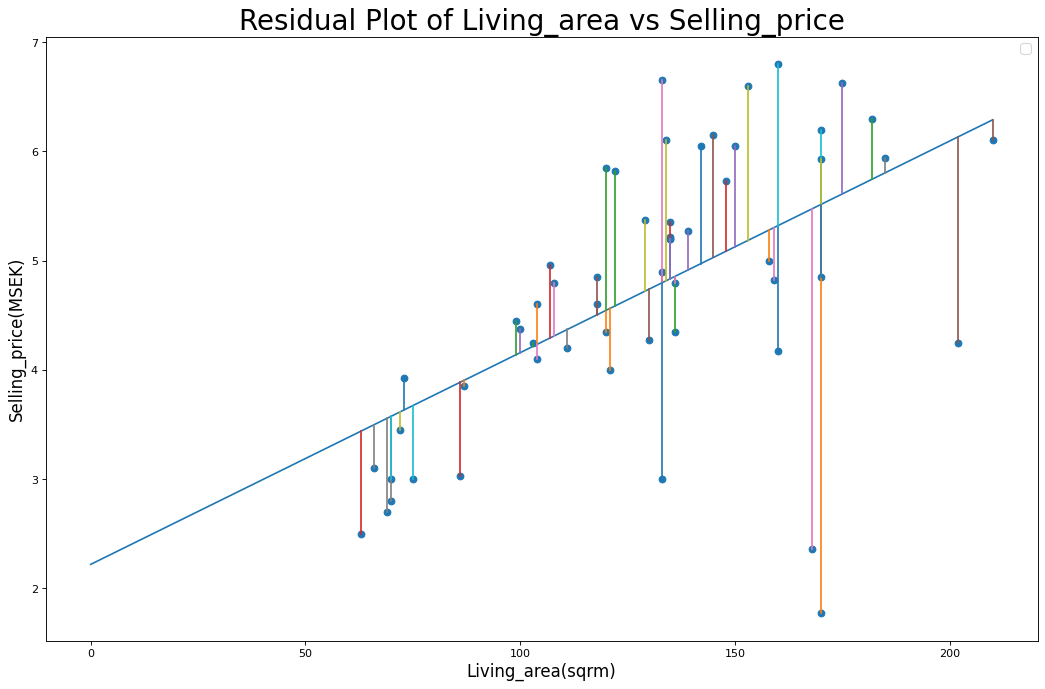

In [ ]:
#Plotting the residual plot

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Residual Plot of Living_area vs Selling_price", fontsize=25)
plt.xlabel("Living_area(sqrm)", fontsize=15)
plt.ylabel("Selling_price(MSEK)", fontsize=15)
plt.legend(fontsize=12)  

plt.scatter(x, y)
plt.plot(xfit, yfit)
  
yPredicted = model.predict(x)

for j in range(len(x)):
    lineXdata = (x[j], x[j])
    lineYdata = (y[j], yPredicted[j])
    plt.plot(lineXdata, lineYdata)


plt.show()


#1e) 

We can see that there are several outliers, especially between 150 and 200 in Living_are which increase residuals and they make the prediction less accurate. To improve the model, first, we can either take those outliers as noise and recalculate the model and regression line. To find the outliers, we can write the program that finds a few points which have the largest error that (𝑦𝑖(correct value) −(𝑘(slop)∙𝑥𝑖+𝑚(intercept)))2 and then exclude them. We can choose the number of outliers arbitrarily in order of largest error however, we can also find the best fit more precisely by calculating minimum error with different k and m. (To minimize the sum of squared erros(or mean), we can apply gradient descent which means that taking a suitable step in opposite direction to the gradient and then repeat until the gradient to zero or close enough.)
 Secondly, we can add more features that have a strong correlation with the selling price such as the number of rooms. After comparing the importance of each feature, we can weigh them according to their importance. Also, realistically, the price of housing is not that simple like linear, we can use more complicated models other than linear regression or even advanced machine learning techniques to get a better result. 

#Task 2

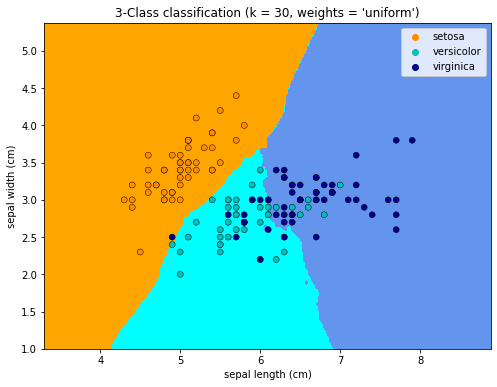

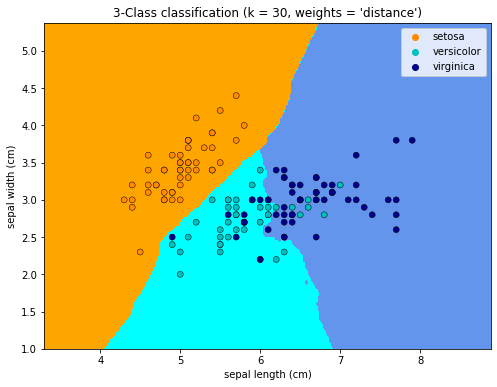

In [ ]:
#To get access to a dataset
from sklearn import datasets

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import warnings 
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# filter warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 30

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target


h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

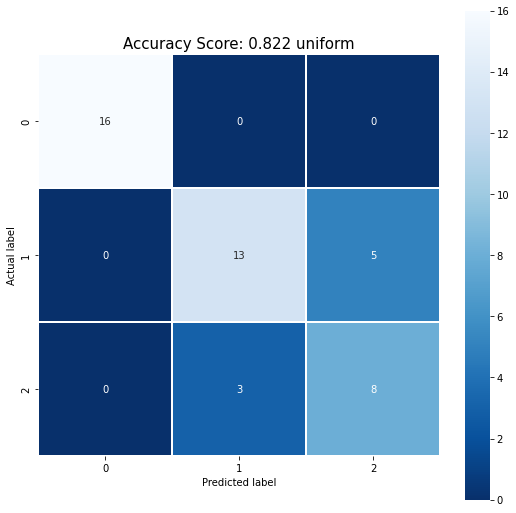

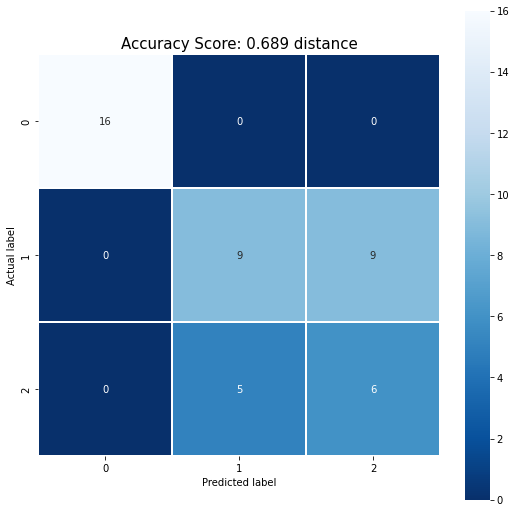

In [ ]:
from sklearn.model_selection import train_test_split
K = 30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
for weights in ["uniform", "distance"]:
  # we create an instance of Neighbours Classifier and fit the data.
  clf = neighbors.KNeighborsClassifier(K, weights=weights)
  clf.fit(x_train, y_train)
  prediction = clf.predict(x_test)
  cm = metrics.confusion_matrix(y_test, prediction)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  score = clf.score(x_test, y_test)
  all_sample_title = 'Accuracy Score: %.3f' % score
  plt.title(all_sample_title + ' ' + weights, size = 15);
  plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
  plt.show();


K = 1, uniform

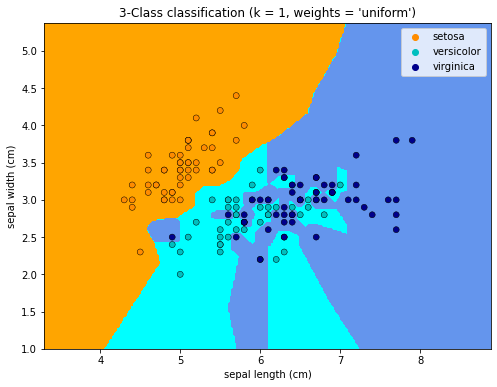

K = 1, distance

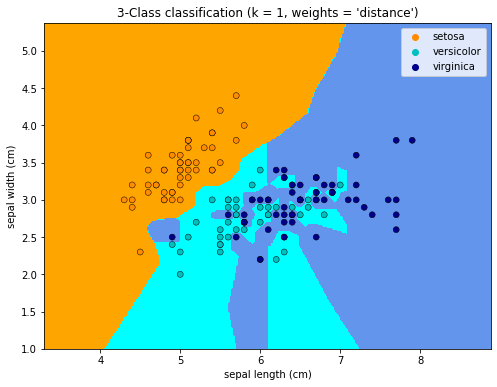

K = 15, uniform

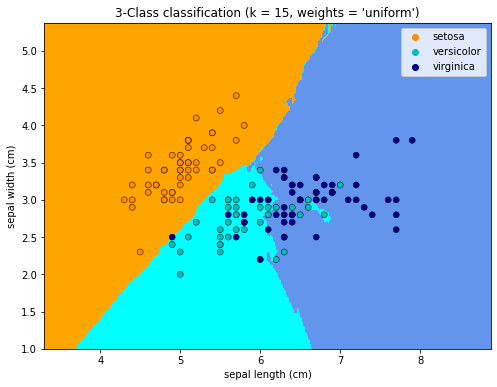

K = 15, distance

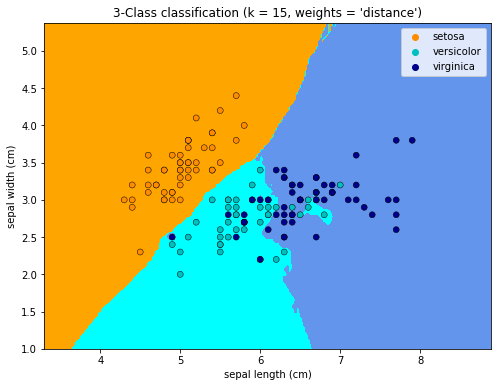

K = 30, weights = uniform

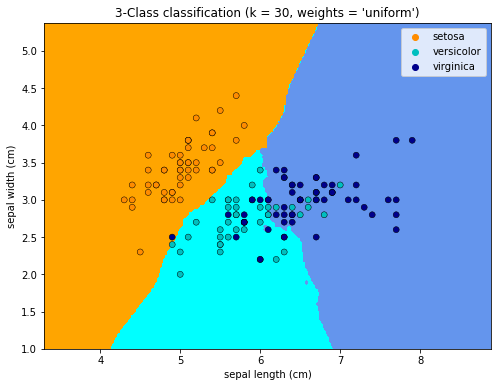

K = 30, weights = distance


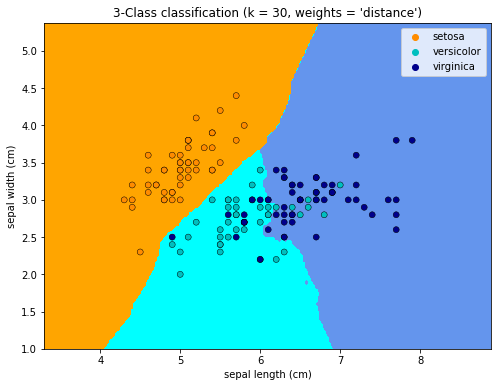

# 2a)
check logistic_regression_2a.ipynb

# 2b) 


The larger K is, the smoother the classification boundary. A large K could lead to underfitting the data. Contrary a small K would lead to overfitting. 



---


In this case, the orange data is located in an isolated area of the graph. Therefore the orange partition is transitioning smoothly into other ones. Neglecting the K, we have obtained a clear intersection between the orange partition and respective partitions.


---



The transition between the blue parts gets smoother with a larger K. This is because the sub-graph of each data point, containing K neighbors, gets easier connected due to the increase of neighbors. When a neighboring graph gets connected they will gain the same partition color. For a small K, the graph is more disjointed, and therefore the partitions will be more spread out. 



---


An assumption to make is that a larger K will be more beneficial for accuracy since the blue data is fairly noisy and the orange partition seems to be static for every K. 


---



With a large K, the intersects of the partitions will approach each other resembling a line. A test value may land on one of the two sides on this line. The probability of a correct prediction is, therefore, larger than with a disjointed partition-intersection. The model may still predict incorrectly with a large K, but the chances are slimmer than with a disjointed partition. 



---


Now let's see the confusion matrices for K = 1, 15, 30.

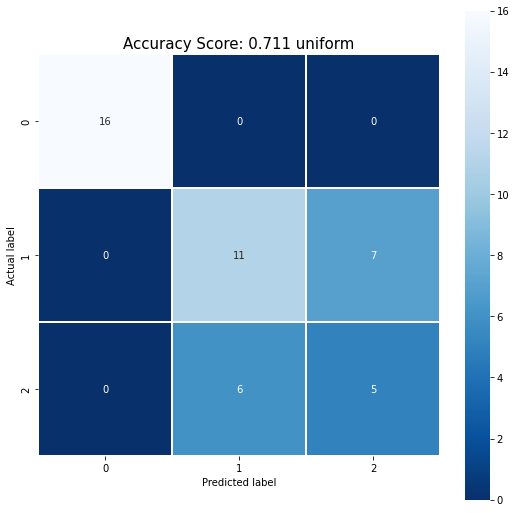

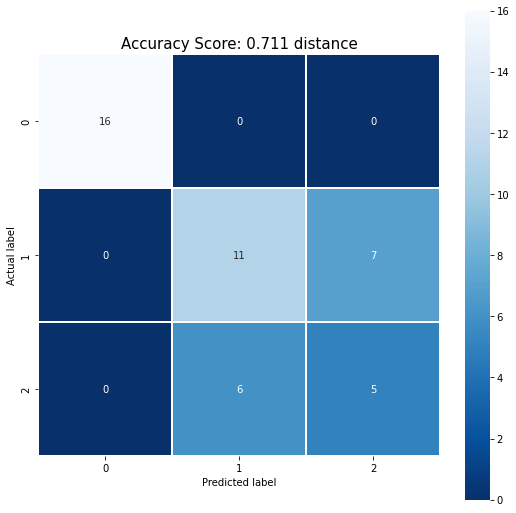

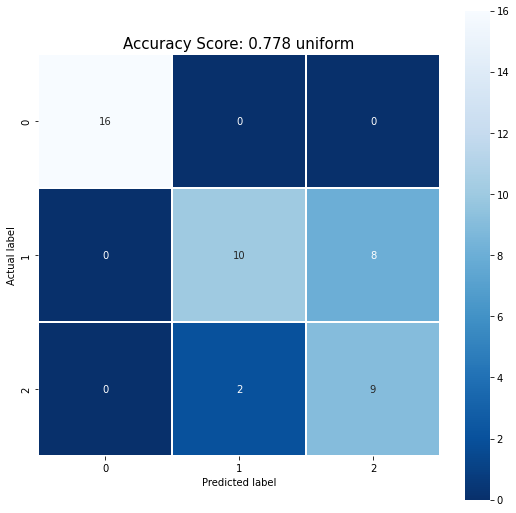

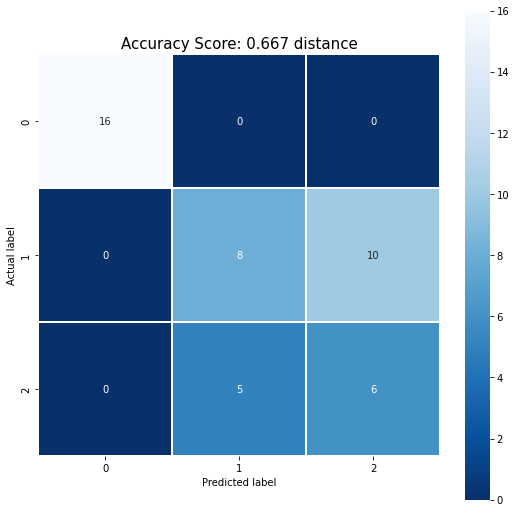

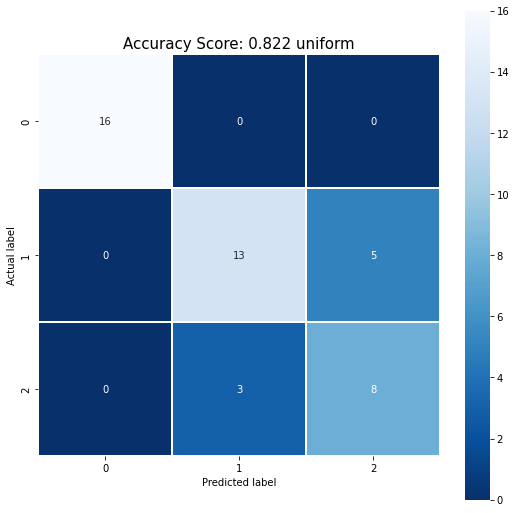

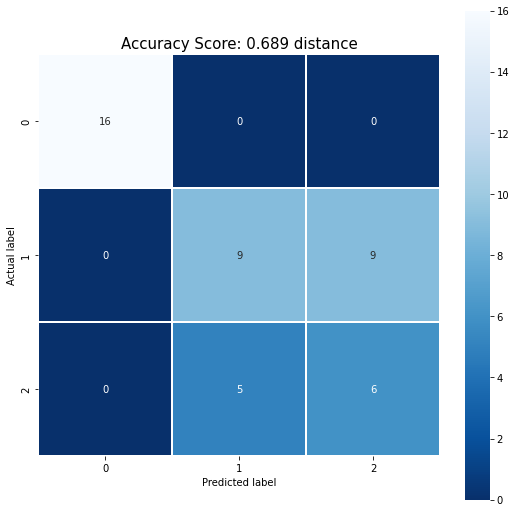

Confusion matrces result:
K / accuracy(Uniform) / accuracy(Distance)


---


1 / 0.711 / 0.711


---


15 / 0.778 / 0.657


---


30 / 0.822 / 0.689


---





#2c)

The most accurate result from the K graph was generated when K was 30 and the distribution was uniform. 

This result abides by our assumption. The K was fairly large relative to the data set, and the intersection between the blue partitions is resembling a straight line. It's also logical that the uniform measure is more accurate since it generates a straighter intersection than the distance measure.

There's a difference when comparing the accuracy of 0.822 to the logistic regression which had an accuracy of 0.644. Multilabel logistic regression fits three lines to divide the space exactly into three. In this case, it won't fit very well since we are dealing with two noisy partitions. The logistic curve is under-fitted while the K graph generates a more compensated model.

#Task 3. 

Explain why it is important to use a separate test (and sometimes validation) set.

With Machine Learning, what we try to do is predict certain data by generating a good model. We use training data set to fit a model in order to determine and find the best combinations of variables that generate a fitted model. On the other hand, test (sometimes validation) datasets are used to evaluate how accurate the fitted model is. In other words, training datasets and testing datasets are divided by different usage. Also, to minimize the possibility of causing unnecessary errors such as over-fitting, the validation and test datasets should not be used to train the model. that's why it is important to use a separate test set. 
About when we need to use a validation dataset, it is up to the amount of data, algorithms we choose, the complexity of the problem, or if there are parameters of a classifier to tune such as a neural network.
